In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Tejes\Downloads\Add_sales_data_2018.csv")
data.head(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,4404.686
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,4418.709
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,4470.775
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,4425.005
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,4446.441


# 1. Check whether there is any relationship between the amount  spent for advertising through five different companies and profit generated.


In [3]:
correlation=data.corr()
correlation

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

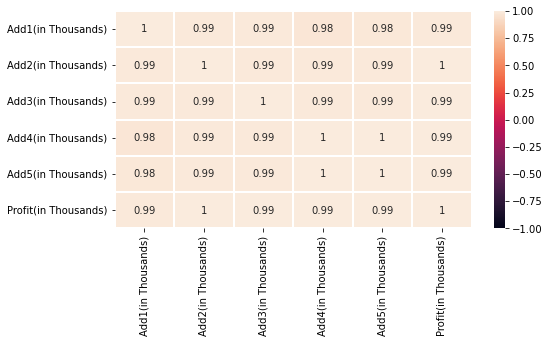

In [6]:
plt.subplots(figsize=(8,4))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True,linewidth=0.2)

In [7]:
# From the Heat Map and the table above it we clearly confirm that there is a strong correlation between Profit and Add1, Add2, Add3, Add4, Add5

In [8]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

# 2. Build a regression model to predict the profit from the given data and  comment your findings on it.

In [18]:
y=data['Profit(in Thousands)']
X=data.drop(['Profit(in Thousands)','Date'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [21]:
from sklearn import linear_model

In [22]:
lr= linear_model.LinearRegression()

In [23]:
model=lr.fit(X_train,y_train)

In [24]:
predictions = model.predict(X_test)

In [25]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [26]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788]


In [29]:
from sklearn.metrics import mean_squared_error

In [31]:
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  3.429773271561334e-25


In [32]:
# since Mean Squared Error is very small the model is a perfect fit

# 3.Predict the profit generated by the company, if they wish to spend the   following amount for advertisement. 
#'Add1(in Thousands)':[290],
#'Add2(in Thousands)':[312],
#'Add3(in Thousands)':[309],
#'Add4(in Thousands)':[298],
#'Add5(in Thousands)':[320]

In [42]:
data_2={'Add1(in Thousands)':[290],'Add2(in Thousands)':[312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]}

In [43]:
data_given=pd.DataFrame(data_2)

In [44]:
data_given

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [46]:
y=data['Profit(in Thousands)']
X=data_given

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [1, 205]